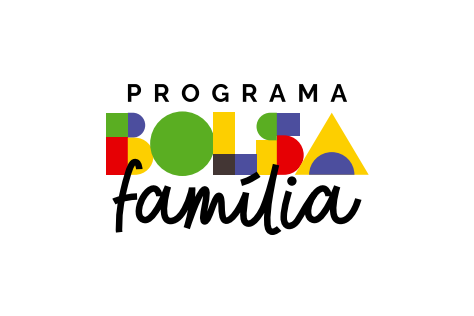

https://dados.gov.br/dados/conjuntos-dados/bolsa-familia

- dados atualizados: 24/04/2024

**Analisado**:
- Valor médio por família.
- Relação entre a quantidade de famílias e valor repassado pelo governo.
- Relação entre a quantidade de famílias e valor médio do benefício pago pelo governo.
- Análise dos outliers dos valores médios do programa.

In [17]:
import pandas as pd
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [18]:
url = 'https://aplicacoes.mds.gov.br/sagi/servicos/misocial/?fq=anomes_s:2024*&fl=codigo_ibge%2Canomes_s%2Cqtd_familias_beneficiarias_bolsa_familia_s%2Cvalor_repassado_bolsa_familia_s%2Cpbf_vlr_medio_benef_f&fq=valor_repassado_bolsa_familia_s%3A*&q=*%3A*&rows=100000&sort=anomes_s%20desc%2C%20codigo_ibge%20asc&wt=csv'

df = pd.read_csv(url)
df.head()

,codigo_ibge,anomes_s,qtd_familias_beneficiarias_bolsa_familia_s,valor_repassado_bolsa_familia_s,pbf_vlr_medio_benef_f
0,110001,202412,1677,1132797.0,679.54
1,110002,202412,7710,5247594.0,683.90
2,110003,202412,307,207117.0,674.65
3,110004,202412,6066,4041564.0,666.70
4,110005,202412,1213,849202.0,702.40


In [19]:
df.shape

(66840, 5)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66840 entries, 0 to 66839
Data columns (total 5 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   codigo_ibge                                 66840 non-null  int64  
 1   anomes_s                                    66840 non-null  int64  
 2   qtd_familias_beneficiarias_bolsa_familia_s  66840 non-null  int64  
 3   valor_repassado_bolsa_familia_s             66840 non-null  float64
 4   pbf_vlr_medio_benef_f                       66840 non-null  float64
dtypes: float64(2), int64(3)
memory usage: 2.5 MB


In [21]:
df['qtd_familias_beneficiarias_bolsa_familia_s'].describe().round(0)

,qtd_familias_beneficiarias_bolsa_familia_s
count,66840.0
mean,3745.0
std,16089.0
min,5.0
25%,510.0
50%,1328.0
75%,3326.0
max,720175.0


In [22]:
df['valor_repassado_bolsa_familia_s'].describe().round(0)

,valor_repassado_bolsa_familia_s
count,66840.0
mean,2549393.0
std,10771851.0
min,2950.0
25%,341104.0
50%,898949.0
75%,2279641.0
max,490340837.0


In [23]:
df['pbf_vlr_medio_benef_f'].describe().round(0)

,pbf_vlr_medio_benef_f
count,66840.0
mean,678.0
std,31.0
min,486.0
25%,661.0
50%,675.0
75%,690.0
max,1152.0


In [24]:
df.isna().value_counts()

,,,,,count
codigo_ibge,anomes_s,qtd_familias_beneficiarias_bolsa_familia_s,valor_repassado_bolsa_familia_s,pbf_vlr_medio_benef_f,
False,False,False,False,False,66840


# **Análises Gráficas:**

**Valor médio por família:**

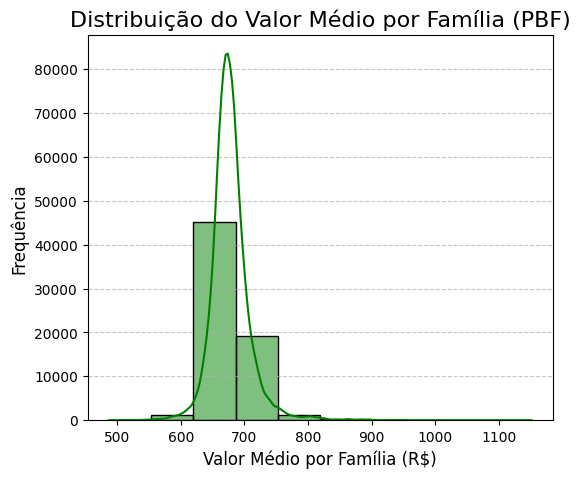

In [28]:
plt.figure(figsize=(6,5))
sns.histplot(df['pbf_vlr_medio_benef_f'], kde = True, bins = 10, color= 'green')
plt.title('Distribuição do Valor Médio por Família (PBF)', fontsize=16)
plt.xlabel('Valor Médio por Família (R$)', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
plt.show()

A maior parte das famílias que fazem parte do programa recebe em média R$678,00


**Relação entre a quantidade de famílias e valor repassado pelo governo:**

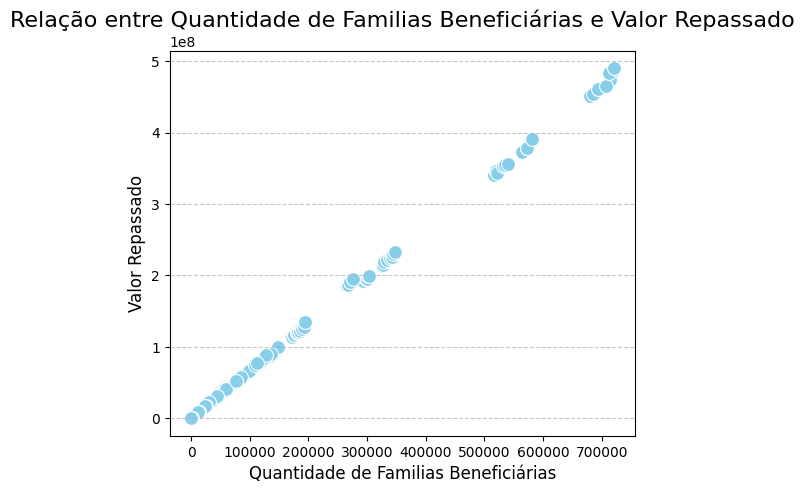

In [42]:
plt.figure(figsize=(6, 5))
sns.scatterplot(data=df, x='qtd_familias_beneficiarias_bolsa_familia_s',
                y='valor_repassado_bolsa_familia_s', color='skyblue', s=100)
plt.title('Relação entre Quantidade de Familias Beneficiárias e Valor Repassado', fontsize=16)
plt.xlabel('Quantidade de Familias Beneficiárias', fontsize=12)
plt.ylabel('Valor Repassado', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

É possível ver a correlação positiva entre a quantidade de famílias e valor repassado, ou seja, quanto mais famílias aderem ao PBF, maior o valor repassado pelo governo.

**Relação entre a quantidade de famílias e valor médio do benefício pago pelo governo:**

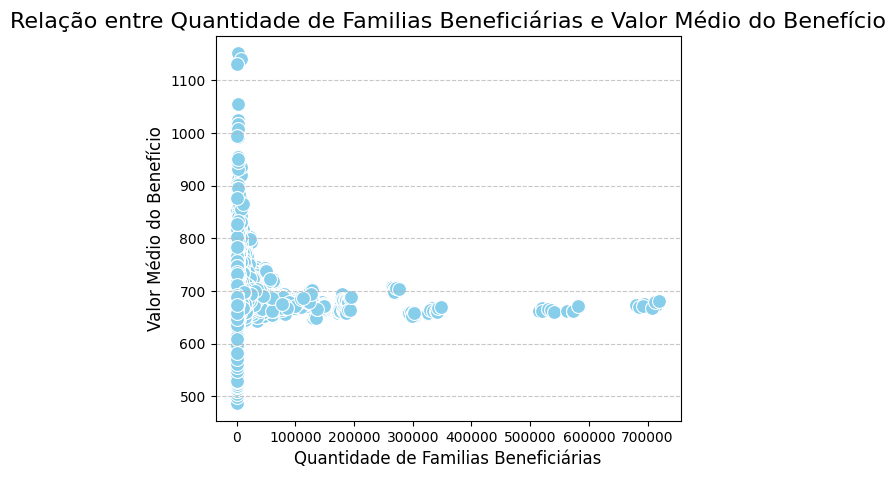

In [41]:
plt.figure(figsize=(6, 5))
sns.scatterplot(data=df, x='qtd_familias_beneficiarias_bolsa_familia_s',
                y='pbf_vlr_medio_benef_f', color='skyblue', s=100)
plt.title('Relação entre Quantidade de Familias Beneficiárias e Valor Médio do Benefício', fontsize=16)
plt.xlabel('Quantidade de Familias Beneficiárias', fontsize=12)
plt.ylabel('Valor Médio do Benefício', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Ao contrário do último gráfico, é possível observar que o valor médio do benefício não possui correlação com o aumento da quantidade de famílias beneficiadas pelo programa.

**Análise dos outliers dos valores médios do programa:**

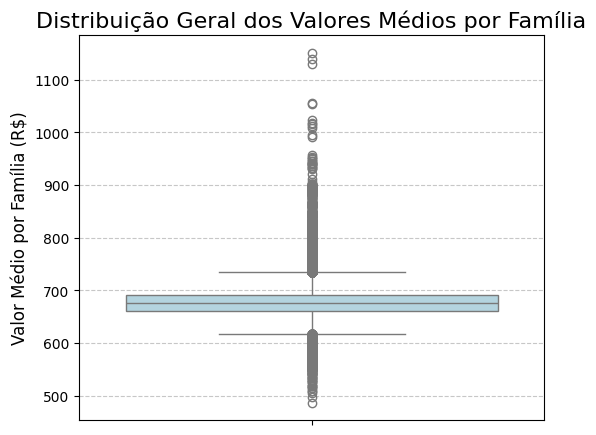

In [39]:
plt.figure(figsize=(6, 5))
sns.boxplot(data=df, y='pbf_vlr_medio_benef_f', color='lightblue')
plt.title('Distribuição Geral dos Valores Médios por Família', fontsize=16)
plt.ylabel('Valor Médio por Família (R$)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Os outliers aqui observados se dão em consideração as regras do programa, pois o benefício é variável de acordo com a condição de cada família, quantidade de integrantes de cada família beneficiada.

Em regra, o valor total do benefício a cada família pode variar de R$ 32,00 -
306,00, de acordo com a renda familiar mensal por pessoa e com o número de
crianças e adolescentes de até 15 anos, gestantes, nutrizes e jovens de 16 e 17
anos.

Para famílias em extrema pobreza com filhos entre zero e seis anos, o valor do
benefício varia de R 102,00 (Benefício Básico + Benefício Variável), até o valor
necessário para que sua renda per capita supere os R$ 70,00 (BSP).

Para receber o benefício, a família precisa estar inscrita no Cadastro Único e ter
renda mensal de até R$ 140,00 por pessoa. Além disso, todos os seus membros de
6 a 15 anos e gestantes devem cumprir as condicionalidades de Saúde e Educação.

A concessão de benefícios é feita com base nas informações do Cadastro Único.
O processo é automatizado e prioriza famílias com menor renda. Ao ser incluída
no Programa, a família tem direito de permanecer por, no mínimo, dois anos ou
enquanto persistir a situação de pobreza, desde que atualize seu cadastro a cada
dois anos, no máximo.

fonte: https://www.mds.gov.br/webarquivos/publicacao/bolsa_familia/Cartilhas/Cartilha_BolsaFamilia.pdf